# **Predicting Employee Retention**

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [114]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [115]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [116]:
# Load the dataset
df=pd.read_csv(r'/content/drive/MyDrive/logistic_reg_assign/Employee_data.csv')


In [117]:
# Check the first few entries
df.head(5)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [118]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [119]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [120]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [121]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [122]:
# Check the number of missing values in each column
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [123]:
# Check the percentage of missing values in each column
df.isnull().sum()/len(df)*100

,0
Employee ID,0.000000
Age,0.000000
Gender,0.000000
Years at Company,0.000000
Job Role,0.000000
Monthly Income,0.000000
Work-Life Balance,0.000000
Job Satisfaction,0.000000
Performance Rating,0.000000
Number of Promotions,0.000000


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [124]:
# Handle the missing value rows in the column
df=df.dropna()

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [125]:
# Check the percentage of remaining data after missing values are removed
df.isnull().sum()/len(df)*100


,0
Employee ID,0.0
Age,0.0
Gender,0.0
Years at Company,0.0
Job Role,0.0
Monthly Income,0.0
Work-Life Balance,0.0
Job Satisfaction,0.0
Performance Rating,0.0
Number of Promotions,0.0


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [126]:
# Write a function to display the categorical columns with their unique values and check for redundant values
df.select_dtypes(include=['object']).nunique()

,0
Gender,2
Job Role,5
Work-Life Balance,4
Job Satisfaction,4
Performance Rating,4
Overtime,2
Education Level,5
Marital Status,3
Job Level,3
Company Size,3


In [127]:
# Check the data
categorical_columns = ['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Marital Status','Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition','Attrition']

for col in categorical_columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values for column 'Gender':
['Male' 'Female']
------------------------------
Unique values for column 'Job Role':
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
------------------------------
Unique values for column 'Work-Life Balance':
['Excellent' 'Poor' 'Good' 'Fair']
------------------------------
Unique values for column 'Job Satisfaction':
['Medium' 'High' 'Very High' 'Low']
------------------------------
Unique values for column 'Performance Rating':
['Average' 'Low' 'High' 'Below Average']
------------------------------
Unique values for column 'Marital Status':
['Married' 'Divorced' 'Single']
------------------------------
Unique values for column 'Job Level':
['Mid' 'Senior' 'Entry']
------------------------------
Unique values for column 'Company Size':
['Medium' 'Small' 'Large']
------------------------------
Unique values for column 'Remote Work':
['No' 'Yes']
------------------------------
Unique values for column 'Leadership Opportunities':
['No' 'Yes'

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [128]:
# Drop redundant columns which are not required for modelling
df.drop(['Employee ID'],axis=1,inplace=True)

In [129]:
# Check first few rows of data
df.head(5)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [130]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [131]:
# Put all the feature variables in X
x=df.drop(['Attrition'],axis=1)

# Put the target variable in y
y=df['Attrition']
print(x.head(5))
print(y.head(5))

   Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Marital Status Number of Dependents Job Level  Company Size  \
0       No  ...         Married                 

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [132]:
# Split the data into 70% train data and 30% validation data
#df_train,df_validation=train_test_split(df,test_size=0.3,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [133]:
# Select numerical columns
numerical_columns=X_train.select_dtypes(include=['int64','float64'])
numerical_columns.head(5)

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
41465,46,26,4617,2,59.0,2,92.0
69350,43,26,4447,3,64.0,0,103.0
28247,27,8,9762,0,84.0,1,16.0
3217,47,29,5244,2,59.0,1,74.0
73636,25,10,4455,0,36.0,0,62.0


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

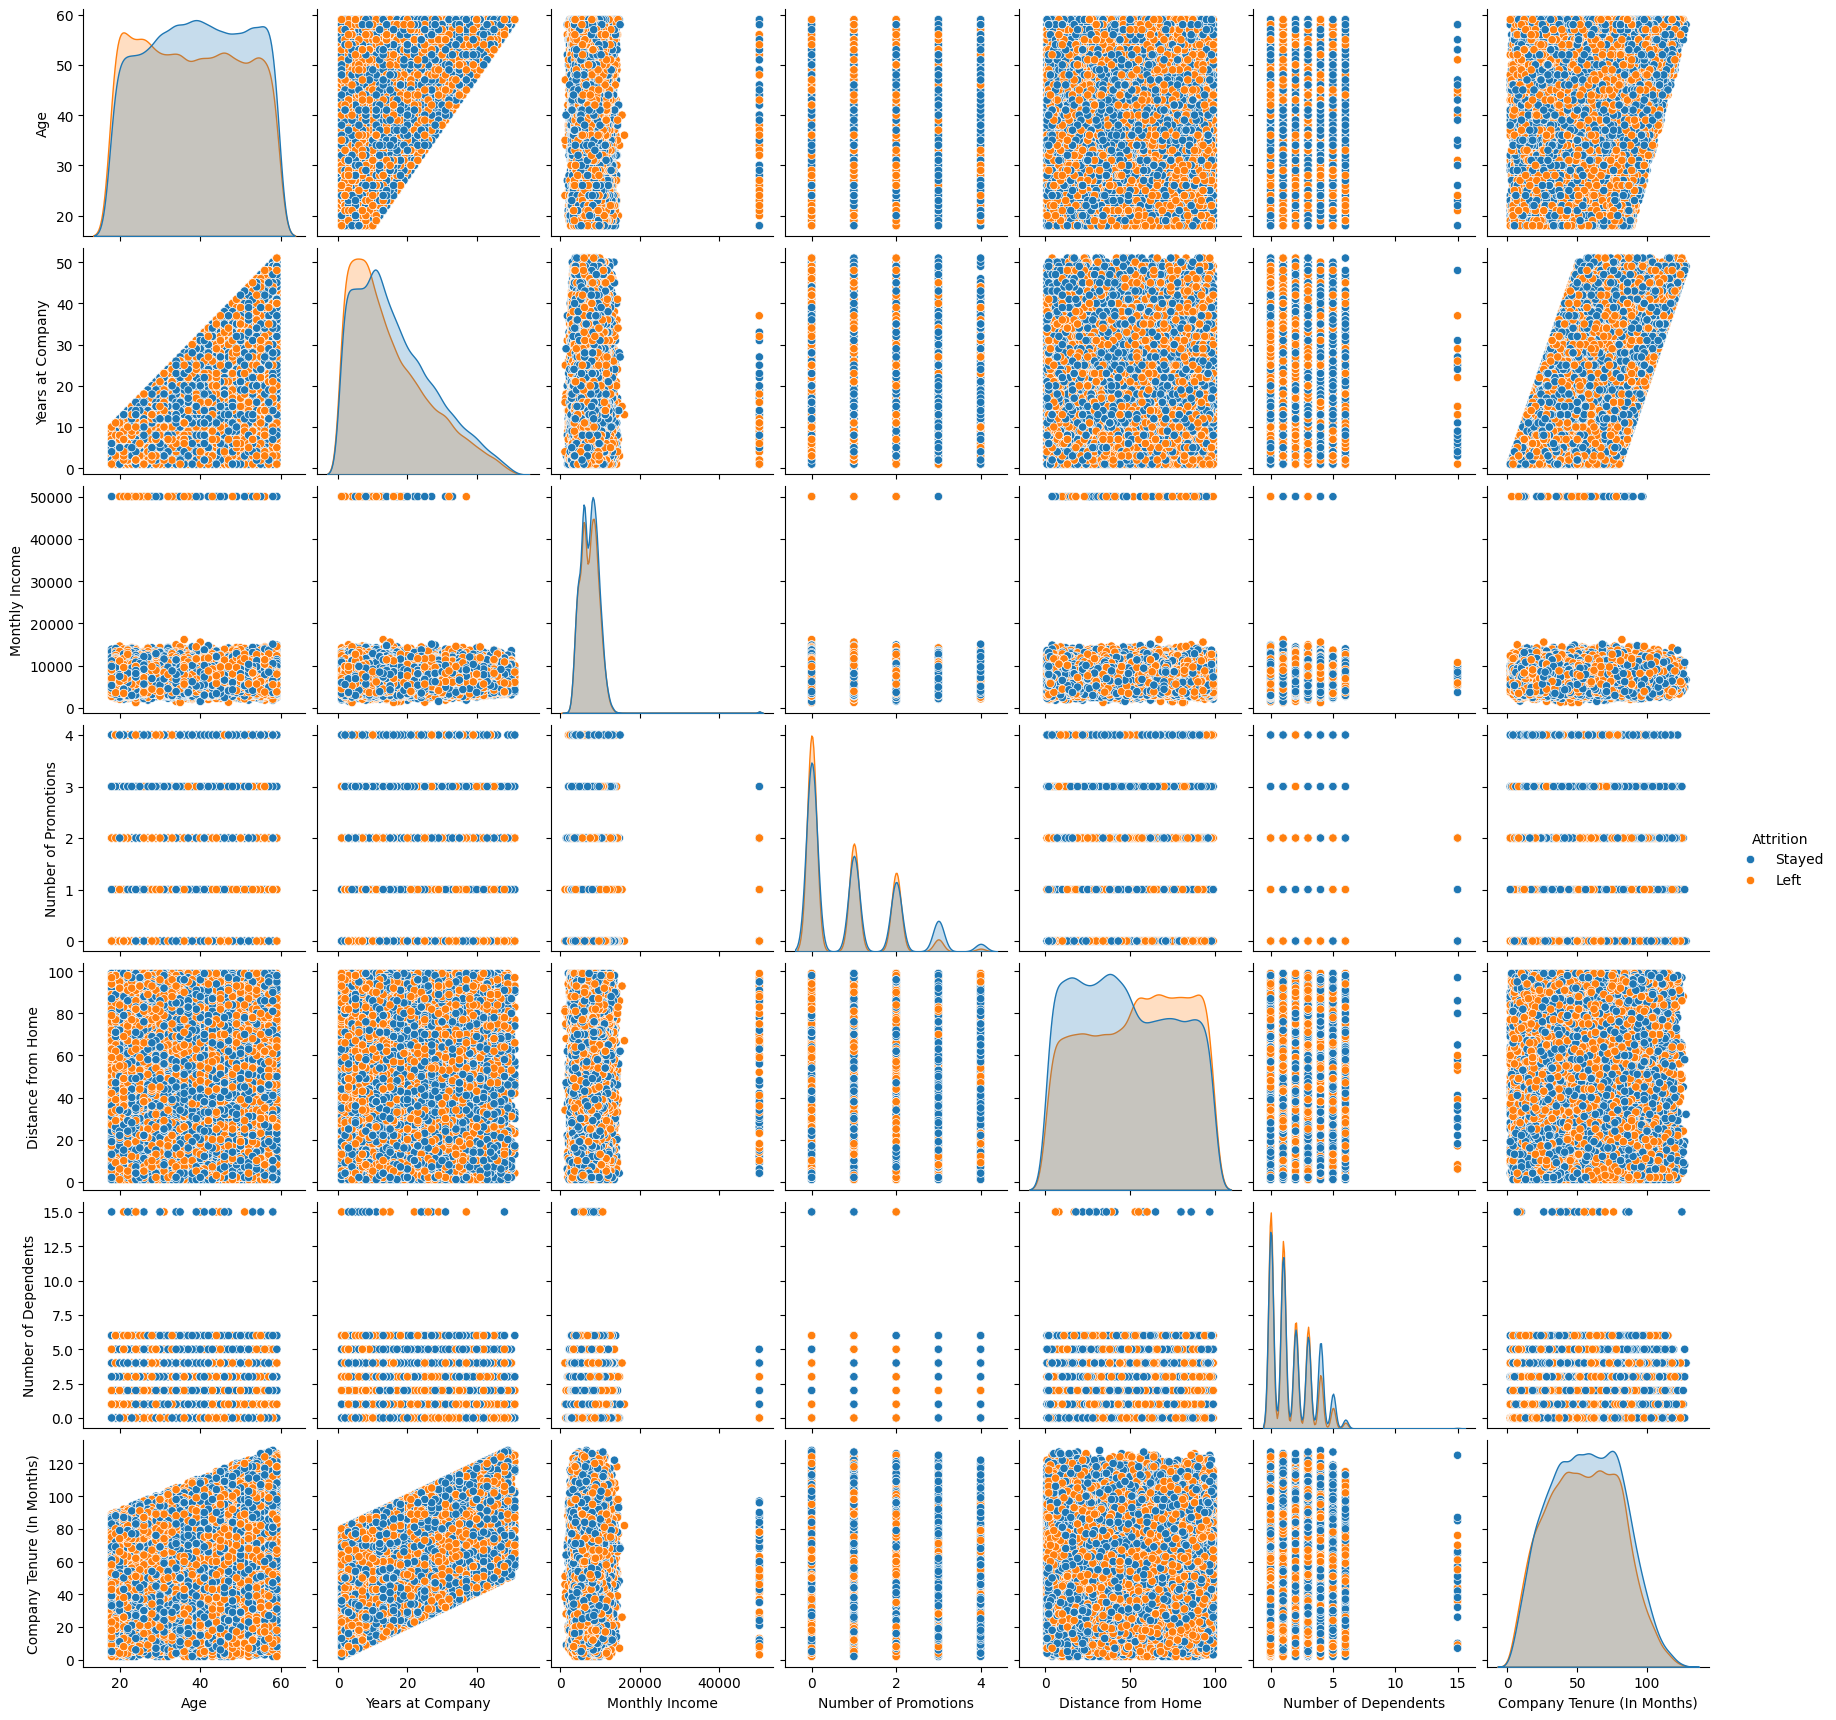

In [134]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sns.pairplot(df, vars=numerical_columns.columns, hue='Attrition')

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

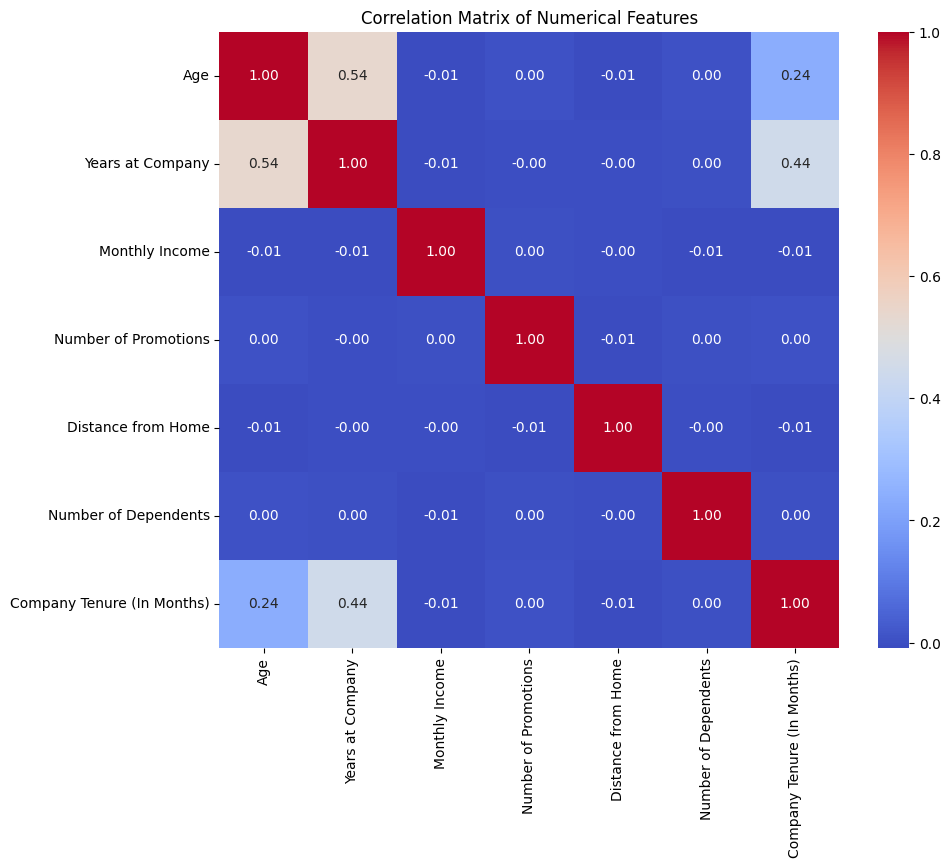

In [135]:
# Create correlation matrix for numerical columns
correlation_matrix=numerical_columns.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

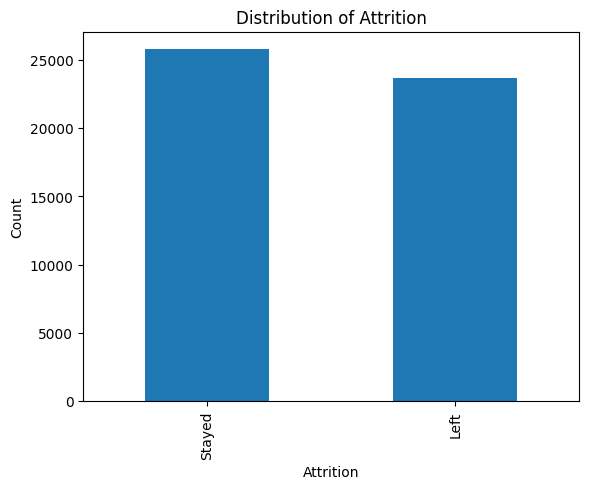

In [136]:
# Plot a bar chart to check class balance
#df_train['Attrition'].value_counts().plot(kind='bar')
y_train.value_counts().plot(kind='bar')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition')
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

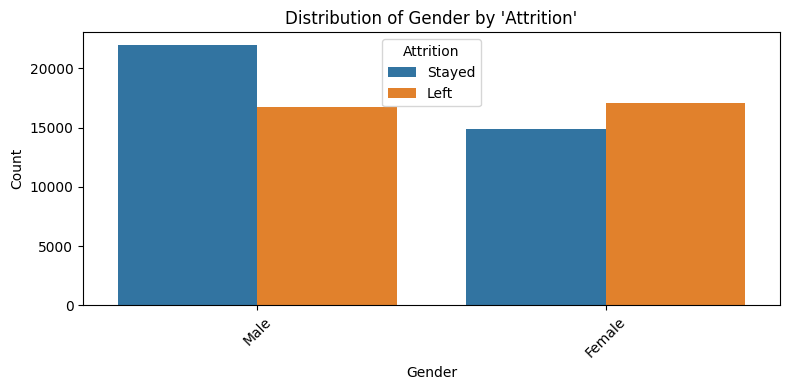

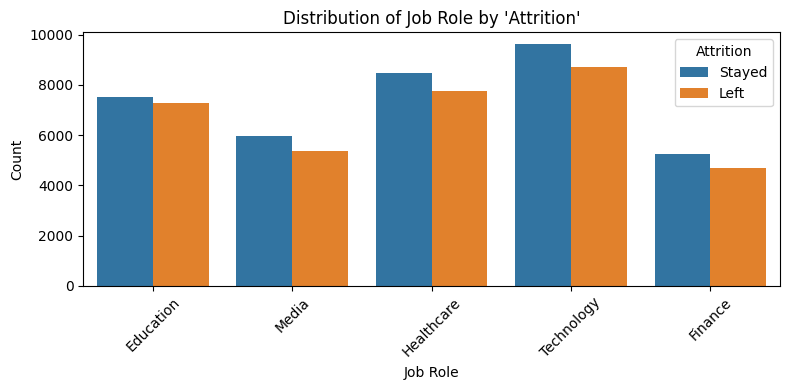

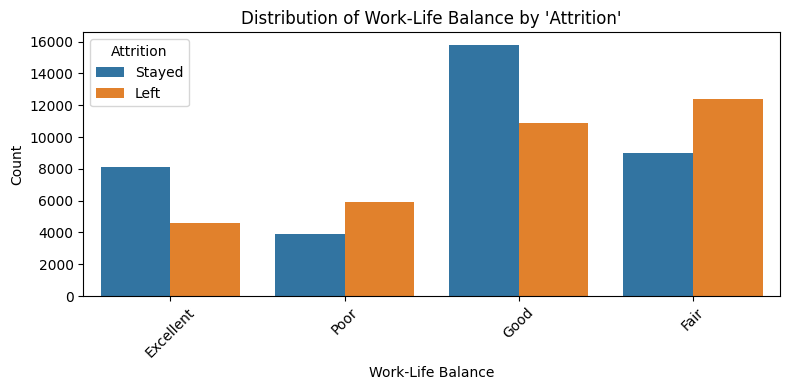

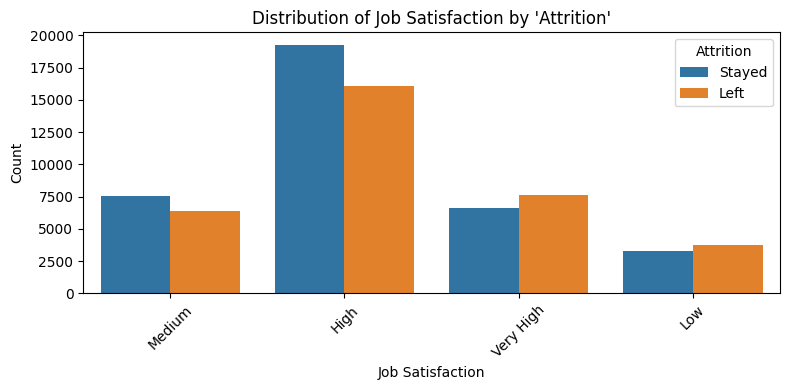

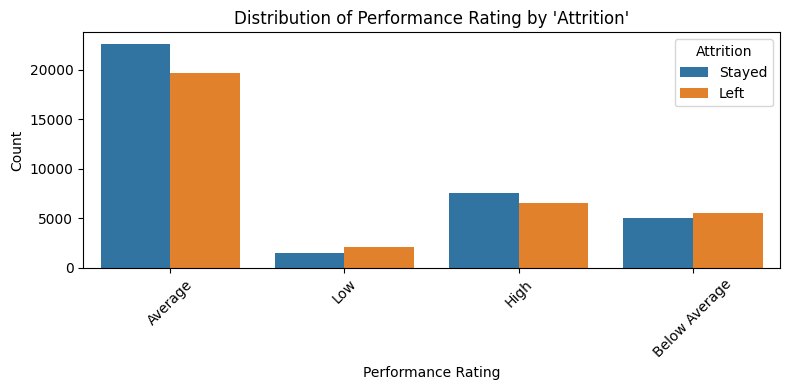

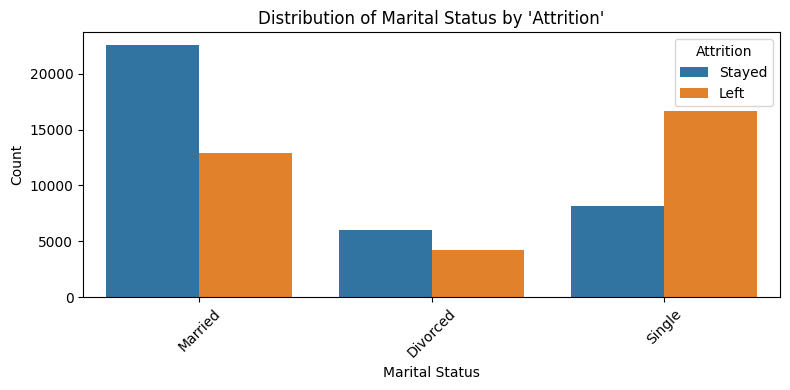

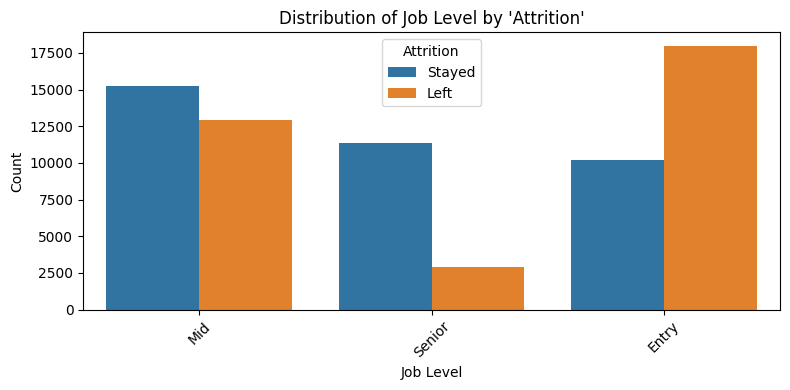

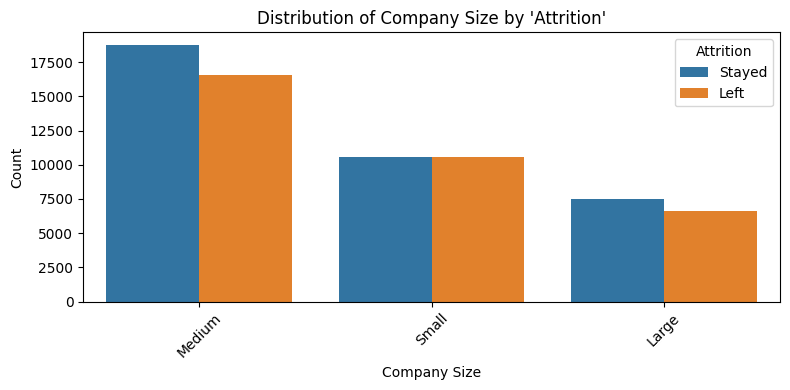

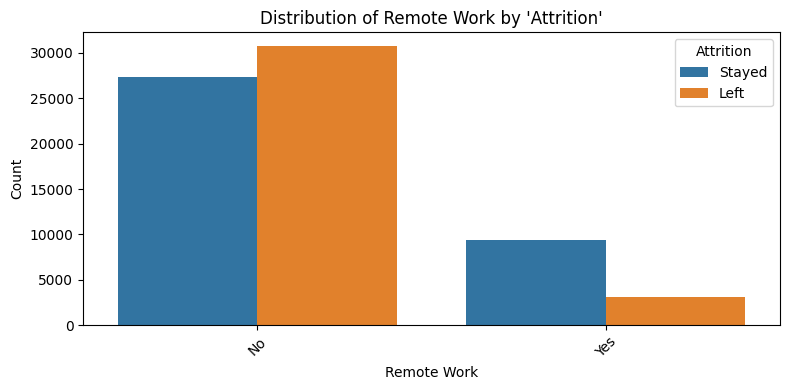

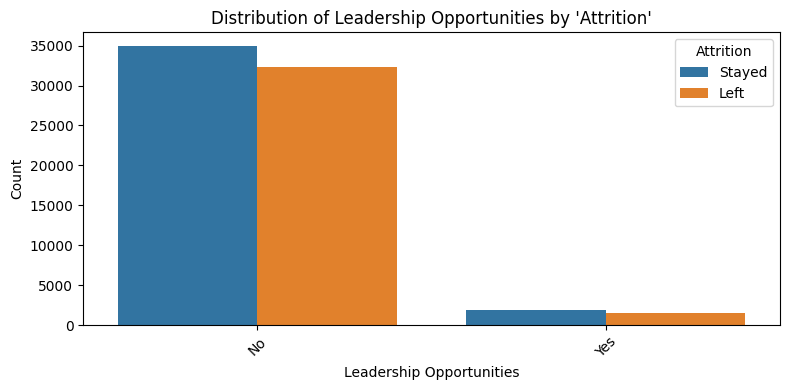

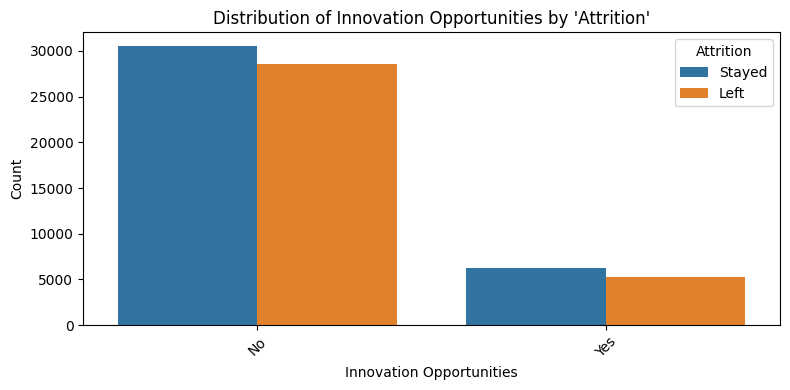

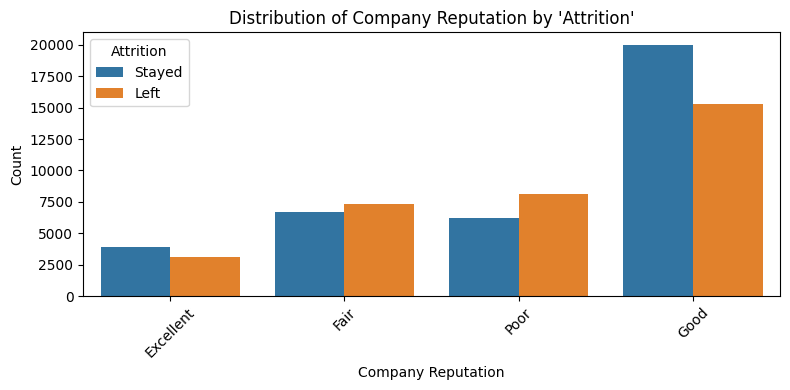

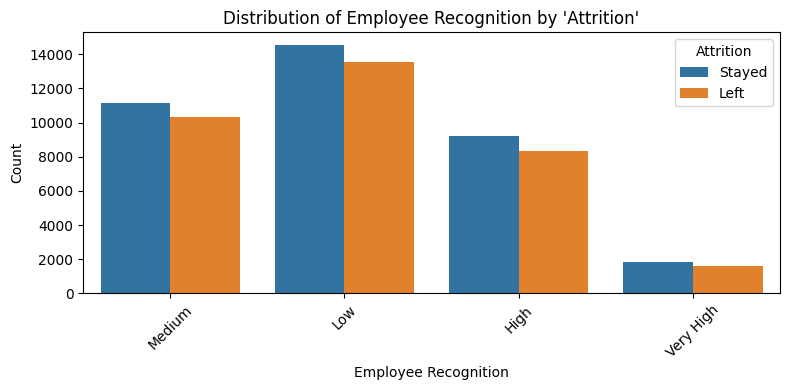

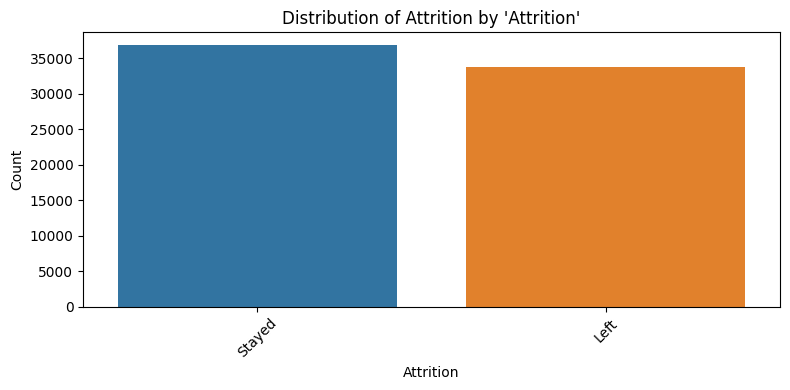

In [137]:
# Plot distribution for each categorical column with target variable
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f"Distribution of {col} by 'Attrition'")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [138]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [139]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [140]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [141]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [142]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [143]:
# Check the categorical columns
#df_train.select_dtypes(include=['object']).head(5)
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition']

In [144]:
X_train['Work-Life Balance'].value_counts()

,count
Work-Life Balance,
Good,18668
Fair,15041
Excellent,8867
Poor,6868


In [145]:
 X_train.select_dtypes(include=['object', 'category']).head(5)


,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
41465,Female,Education,Fair,High,Low,No,Associate Degree,Single,Entry,Medium,No,No,No,Good,High
69350,Male,Education,Good,High,High,No,High School,Single,Entry,Small,No,No,Yes,Poor,Low
28247,Male,Finance,Excellent,Very High,Below Average,Yes,Bachelorâ€™s Degree,Single,Mid,Medium,No,No,Yes,Good,Low
3217,Female,Media,Fair,Medium,Average,Yes,PhD,Married,Mid,Large,No,No,No,Excellent,Low
73636,Female,Education,Good,High,High,No,Bachelorâ€™s Degree,Single,Entry,Medium,No,No,No,Good,Medium


In [146]:
 #1. Convert the categorical data to numerical data i.e. Encoding
        #a. Label Encoding: When the data is ordinal data i.e. it has some order
            # Poor|Average|Good|Excellent 0|1|2|3
        #b. One Hot Encoding: When there is category i.e. State, City, Department, Gender
                #S1|S2|S3
                # 1|0|0
                # 0|1|0
                # 0|0|1

In [147]:
#label encoding: Gender,overtime,RemoteWork,Leadership Opportunities,Innovation Opportunities
#One Hot Encoding:Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Education Level,Marital Status,Job Level,Company Size,Company Reputation,Employee Recognition

In [148]:
X_train.head(5)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
41465,46,Female,26,Education,4617,Fair,High,Low,2,No,...,Single,2,Entry,Medium,92.0,No,No,No,Good,High
69350,43,Male,26,Education,4447,Good,High,High,3,No,...,Single,0,Entry,Small,103.0,No,No,Yes,Poor,Low
28247,27,Male,8,Finance,9762,Excellent,Very High,Below Average,0,Yes,...,Single,1,Mid,Medium,16.0,No,No,Yes,Good,Low
3217,47,Female,29,Media,5244,Fair,Medium,Average,2,Yes,...,Married,1,Mid,Large,74.0,No,No,No,Excellent,Low
73636,25,Female,10,Education,4455,Good,High,High,0,No,...,Single,0,Entry,Medium,62.0,No,No,No,Good,Medium


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [149]:
from re import X
# Create dummy variables using the 'get_dummies' for independent columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
binary_cols = ['Gender','Overtime','Remote Work','Leadership Opportunities','Innovation Opportunities']
for col in binary_cols:
 X_train[col] = le.fit_transform(X_train[col])

one_hot_cols = ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
                'Education Level', 'Marital Status', 'Job Level', 'Company Size',
                'Company Reputation', 'Employee Recognition']

X_train = pd.get_dummies(X_train, columns=one_hot_cols).astype(int)

# Add the results to the master DataFrame
df=pd.concat([X_train,y_train],axis=1)
df.head(5)

,Age,Gender,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure (In Months),Remote Work,...,Company Size_Small,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High,Attrition
41465,46,0,26,4617,2,0,59,2,92,0,...,0,0,0,1,0,1,0,0,0,Left
69350,43,1,26,4447,3,0,64,0,103,0,...,1,0,0,0,1,0,1,0,0,Left
28247,27,1,8,9762,0,1,84,1,16,0,...,0,0,0,1,0,0,1,0,0,Left
3217,47,0,29,5244,2,1,59,1,74,0,...,0,1,0,0,0,0,1,0,0,Left
73636,25,0,10,4455,0,0,36,0,62,0,...,0,0,0,1,0,0,0,1,0,Left


In [150]:
# one_hot_cols = ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
#                 'Education Level', 'Marital Status', 'Job Level', 'Company Size',
#                 'Company Reputation', 'Employee Recognition']

# X_train = pd.get_dummies(X_train, columns=one_hot_cols).astype(int)


In [151]:
X_train.head(5)

,Age,Gender,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure (In Months),Remote Work,...,Company Size_Medium,Company Size_Small,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
41465,46,0,26,4617,2,0,59,2,92,0,...,1,0,0,0,1,0,1,0,0,0
69350,43,1,26,4447,3,0,64,0,103,0,...,0,1,0,0,0,1,0,1,0,0
28247,27,1,8,9762,0,1,84,1,16,0,...,1,0,0,0,1,0,0,1,0,0
3217,47,0,29,5244,2,1,59,1,74,0,...,0,0,1,0,0,0,0,1,0,0
73636,25,0,10,4455,0,0,36,0,62,0,...,1,0,0,0,1,0,0,0,1,0





Now, drop the original categorical columns and check the DataFrame

In [152]:
# Drop the original categorical columns and check the DataFrame
#X_train.drop(columns=one_hot_cols, inplace=True)


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [153]:
# Create dummy variables using the 'get_dummies' for independent columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
binary_cols = ['Gender','Overtime','Remote Work','Leadership Opportunities','Innovation Opportunities']
for col in binary_cols:
 X_test[col] = le.fit_transform(X_test[col])

one_hot_cols = ['Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
                'Education Level', 'Marital Status', 'Job Level', 'Company Size',
                'Company Reputation', 'Employee Recognition']

X_test = pd.get_dummies(X_test, columns=one_hot_cols).astype(int)

# Add the results to the master DataFrame
df=pd.concat([X_test,y_test],axis=1)
df.head(5)

,Age,Gender,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure (In Months),Remote Work,...,Company Size_Small,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High,Attrition
23813,46,1,1,7740,3,0,78,2,3,0,...,1,0,0,1,0,0,1,0,0,Stayed
14537,32,1,6,8779,1,0,91,0,35,1,...,0,0,0,0,1,1,0,0,0,Left
45192,53,1,10,11683,1,0,71,1,39,0,...,0,0,0,1,0,0,0,1,0,Left
13765,50,0,2,7305,2,1,71,1,3,0,...,0,0,1,0,0,1,0,0,0,Left
3411,48,1,24,10114,0,0,2,1,64,0,...,0,1,0,0,0,1,0,0,0,Stayed


Now, drop the original categorical columns and check the DataFrame

In [154]:
# Drop categorical columns and check the DataFrame
df.columns

Index(['Age', 'Gender', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Number of Dependents', 'Company Tenure (In Months)', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Job Role_Education', 'Job Role_Finance', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_High',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Average',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Education Level_Associate Degree',
       'Education Level_Bachelorâ€™s Degree', 'Education Level_High School',
       'Education Level_Masterâ€™s Degree', 'Education Level_PhD',
       'Marital Status_Divorced', 'Marital Status_Married'

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [155]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])
y_val_df = pd.DataFrame(y_test, columns=['Attrition'])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [156]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_df = pd.get_dummies(y_train_df, columns=['Attrition']).astype(int)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [157]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val_df = pd.get_dummies(y_test, columns=['Attrition']).astype(int)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [158]:
# Drop redundant columns from both train and validation
y_train_df.drop(columns=['Attrition_Stayed'], inplace=True)
y_val_df.drop(columns=['Stayed'], inplace=True)

In [159]:
y_train_df.value_counts()

,count
Attrition_Left,
0,25785
1,23659


In [160]:
y_val_df.head()

,Left
23813,0
14537,1
45192,1
13765,1
3411,0


In [241]:
y_val_df.head()

,Left
23813,0
14537,1
45192,1
13765,1
3411,0


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [161]:
#numeric_col=numerical_columns.columns.to_list(),
numeric_col=['Age','Years at Company','Monthly Income','Distance from Home','Company Tenure (In Months)']
numeric_col

['Age',
 'Years at Company',
 'Monthly Income',
 'Distance from Home',
 'Company Tenure (In Months)']

In [162]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [163]:
# Scale the numeric features present in the training set
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
# # Scale the numerical features present in the validation set
# numeric_col_test=X_test.select_dtypes(include=['int64','float64'])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])
print(X_train.head(5))
print(X_test.head(5))

            Age  Gender  Years at Company  Monthly Income  \
41465  0.619633       0          0.919879       -1.064176   
69350  0.371227       1          0.919879       -1.130434   
28247 -0.953603       1         -0.685603        0.941122   
3217   0.702434       0          1.187460       -0.819798   
73636 -1.119207       0         -0.507216       -1.127316   

       Number of Promotions  Overtime  Distance from Home  \
41465                     2         0            0.319585   
69350                     3         0            0.494961   
28247                     0         1            1.196466   
3217                      2         1            0.319585   
73636                     0         0           -0.487146   

       Number of Dependents  Company Tenure (In Months)  Remote Work  ...  \
41465                     2                    1.427790            0  ...   
69350                     0                    1.860823            0  ...   
28247                     1        

In [164]:
X_train.head(5)

,Age,Gender,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure (In Months),Remote Work,...,Company Size_Medium,Company Size_Small,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
41465,0.619633,0,0.919879,-1.064176,2,0,0.319585,2,1.427790,0,...,1,0,0,0,1,0,1,0,0,0
69350,0.371227,1,0.919879,-1.130434,3,0,0.494961,0,1.860823,0,...,0,1,0,0,0,1,0,1,0,0
28247,-0.953603,1,-0.685603,0.941122,0,1,1.196466,1,-1.564070,0,...,1,0,0,0,1,0,0,1,0,0
3217,0.702434,0,1.187460,-0.819798,2,1,0.319585,1,0.719192,0,...,0,0,1,0,0,0,0,1,0,0
73636,-1.119207,0,-0.507216,-1.127316,0,0,-0.487146,0,0.246793,0,...,1,0,0,0,1,0,0,0,1,0


In [165]:
X_test.head(5)

,Age,Gender,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure (In Months),Remote Work,...,Company Size_Medium,Company Size_Small,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
23813,0.619633,1,-1.309957,0.153034,3,0,0.986015,2,-2.075836,0,...,0,1,0,0,1,0,0,1,0,0
14537,-0.539594,1,-0.863990,0.557991,1,0,1.441993,0,-0.816105,1,...,0,0,0,0,0,1,1,0,0,0
45192,1.199246,1,-0.507216,1.689845,1,0,0.740488,1,-0.658639,0,...,1,0,0,0,1,0,0,0,1,0
13765,0.950840,0,-1.220764,-0.016510,2,1,0.740488,1,-2.075836,0,...,1,0,0,1,0,0,1,0,0,0
3411,0.785236,1,0.741492,1.078316,0,0,-1.679706,1,0.325526,0,...,1,0,1,0,0,0,1,0,0,0


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [166]:
y_train_df.head()

,Attrition_Left
41465,1
69350,1
28247,1
3217,1
73636,1


In [167]:
y_train_df.rename(columns={'Attrition_Left': 'Attrition'}, inplace=True)
y_train_df.value_counts()

,count
Attrition,
0,25785
1,23659


In [168]:
y_train_df.shape

(49444, 1)

In [169]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train_df)

LogisticRegression()

In [170]:
import numpy as np
np.round(logmodel.coef_,2)

array([[-0.08, -0.61, -0.16,  0.01, -0.27,  0.39,  0.29, -0.15,  0.  ,
        -1.77, -0.23, -0.13,  0.13,  0.  ,  0.05,  0.01,  0.03, -0.74,
         0.6 , -0.46,  0.8 , -0.21,  0.32, -0.2 ,  0.3 , -0.19,  0.12,
        -0.17,  0.44,  0.34,  0.35,  0.37,  0.39, -1.24, -0.39, -0.63,
         1.22,  1.29,  0.26, -1.35, -0.  , -0.01,  0.21, -0.25,  0.26,
        -0.3 ,  0.51,  0.05,  0.08,  0.08, -0.  ]])

In [171]:
logmodel.intercept_

array([0.20783317])

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [172]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

# Apply RFE with logistic regression to select top 15 features
rfe = RFE(estimator=logmodel, n_features_to_select=15)
rfe.fit(X_train, y_train_df['Attrition'])

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [173]:
# Display the features selected by RFE
selected_features = X_train.columns[rfe.support_].tolist()
print("Top 15 Selected Features:", selected_features)

Top 15 Selected Features: ['Gender', 'Remote Work', 'Work-Life Balance_Excellent', 'Work-Life Balance_Fair', 'Work-Life Balance_Good', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Low', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Entry', 'Job Level_Senior', 'Company Reputation_Excellent', 'Company Reputation_Good']


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [174]:
# Put columns selected by RFE into variable 'col'
col=['Gender', 'Remote Work', 'Work-Life Balance_Excellent', 'Work-Life Balance_Fair', 'Work-Life Balance_Good', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Low', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Entry', 'Job Level_Senior', 'Company Reputation_Excellent', 'Company Reputation_Good']

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [175]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]

In [176]:
# View the training data
X_train_rfe.head(5)

,Gender,Remote Work,Work-Life Balance_Excellent,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Entry,Job Level_Senior,Company Reputation_Excellent,Company Reputation_Good
41465,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
69350,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
28247,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3217,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
73636,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [177]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

# Add a constant to the training data
X_train_sm = sm.add_constant(X_train_rfe)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [178]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logit_model = sm.Logit(y_train_df['Attrition'], X_train_sm)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.509445
         Iterations 6


**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [179]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
# Make a VIF DataFrame for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF DataFrame
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

print(vif_data)

                         Feature       VIF
0                          const  0.000000
1                         Gender  1.000448
2                    Remote Work  1.000395
3    Work-Life Balance_Excellent       inf
4         Work-Life Balance_Fair       inf
5         Work-Life Balance_Good       inf
6         Work-Life Balance_Poor       inf
7           Job Satisfaction_Low  1.028979
8     Job Satisfaction_Very High  1.028978
9         Performance Rating_Low  1.000078
10           Education Level_PhD  1.000259
11         Marital Status_Single  1.000207
12               Job Level_Entry  1.202031
13              Job Level_Senior  1.202087
14  Company Reputation_Excellent  1.123323
15       Company Reputation_Good  1.123006


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

In [181]:
X_train_sm.drop('Work-Life Balance_Poor', axis=1, inplace=True)

In [182]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

print(vif_data)

                         Feature        VIF
0                          const  12.697819
1                         Gender   1.000448
2                    Remote Work   1.000395
3    Work-Life Balance_Excellent   1.880679
4         Work-Life Balance_Fair   2.220539
5         Work-Life Balance_Good   2.314942
6           Job Satisfaction_Low   1.028994
7     Job Satisfaction_Very High   1.028982
8         Performance Rating_Low   1.000487
9            Education Level_PhD   1.000259
10         Marital Status_Single   1.000224
11               Job Level_Entry   1.202077
12              Job Level_Senior   1.202088
13  Company Reputation_Excellent   1.123324
14       Company Reputation_Good   1.123008


7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [183]:
# Step 1: Add constant to your current X_train_final (15 columns)
X_train_sm = sm.add_constant(X_train)

# Step 2: Refit the model if needed
logit_model = sm.Logit(y_train_df['Attrition'], X_train_sm)
result = logit_model.fit()



Optimization terminated successfully.
         Current function value: 0.483698
         Iterations 6


In [184]:
# Predict the probabilities on the training set
train_probs = result.predict(X_train_sm)  # X_train_sm has the constant added

# Example: show first 5 predicted probabilities
print(train_probs.head())


41465    0.943048
69350    0.830942
28247    0.820431
3217     0.140556
73636    0.895176
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [185]:
# Reshape it into an array
import numpy as np

# Convert to NumPy array and reshape to a 2D array with one column
train_probs_array = np.array(train_probs).reshape(-1, 1)

print(train_probs_array.shape)

(49444, 1)


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [186]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
# Predict probabilities (ensure X_train_sm matches model's features)
train_probs = result.predict(X_train_sm)

# Create a new DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual_Attrition': y_train_df['Attrition'],
    'Predicted_Probability': train_probs
})

# Preview the DataFrame
print(results_df.head())


       Actual_Attrition  Predicted_Probability
41465                 1               0.943048
69350                 1               0.830942
28247                 1               0.820431
3217                  1               0.140556
73636                 1               0.895176


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [187]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
results_df['Predicted'] = (results_df['Predicted_Probability'] > 0.5).astype(int)
print(results_df.head())

       Actual_Attrition  Predicted_Probability  Predicted
41465                 1               0.943048          1
69350                 1               0.830942          1
28247                 1               0.820431          1
3217                  1               0.140556          0
73636                 1               0.895176          1


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [188]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(results_df['Actual_Attrition'], results_df['Predicted'])

# Print the accuracy
print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.7527


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [189]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(results_df['Actual_Attrition'], results_df['Predicted'])
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[19745  6040]
 [ 6186 17473]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [190]:
conf_matrix = metrics.confusion_matrix(results_df['Actual_Attrition'], results_df['Predicted'])

# Assign the values
tn, fp, fn, tp = conf_matrix.ravel()

# Print the results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 19745
False Positives (FP): 6040
False Negatives (FN): 6186
True Positives (TP): 17473


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [191]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.7385


In [192]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7658


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [193]:
# Calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")


Precision: 0.7431


In [194]:
# Calculate recall
recall = tp / (tp + fn)
print(f"Recall: {recall:.4f}")


Recall: 0.7385


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [195]:
# Define ROC function
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [196]:

def plot_roc_curve(y_true, y_prob):
    """
    Plots the ROC curve and prints AUC score.

    Parameters:
    y_true : array-like
        Actual binary labels (0 or 1)
    y_prob : array-like
        Predicted probabilities of the positive class
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    print(f"AUC Score: {auc:.4f}")

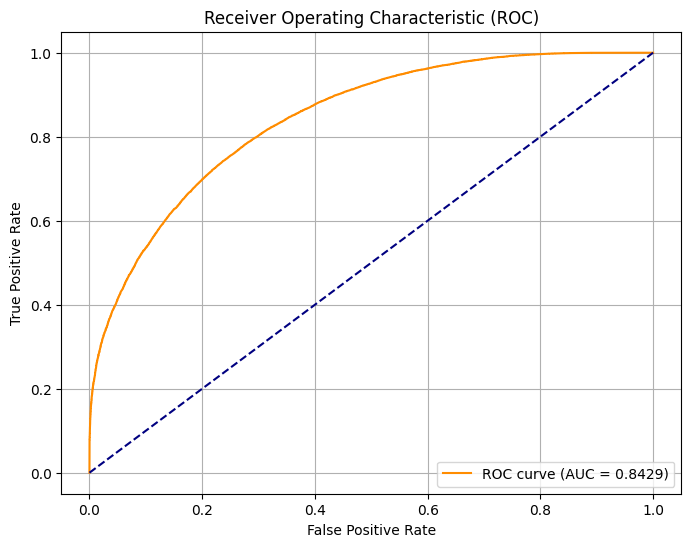

AUC Score: 0.8429


In [197]:
# Call the ROC function
plot_roc_curve(results_df['Actual_Attrition'], results_df['Predicted_Probability'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [198]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
df_train = pd.DataFrame({'Actual': y_train_df['Attrition'], 'Prob': train_probs})
# Step 2: Define cutoffs to explore
cutoffs = [0.1 * i for i in range(1, 10)]  # 0.1 to 0.9

# Step 3: Create prediction columns based on cutoffs
for cutoff in cutoffs:
    col = f'Pred_{cutoff:.1f}'
    df_train[col] = (df_train['Prob'] >= cutoff).astype(int)
df_train.head()

,Actual,Prob,Pred_0.1,Pred_0.2,Pred_0.3,Pred_0.4,Pred_0.5,Pred_0.6,Pred_0.7,Pred_0.8,Pred_0.9
41465,1,0.943048,1,1,1,1,1,1,1,1,1
69350,1,0.830942,1,1,1,1,1,1,1,1,0
28247,1,0.820431,1,1,1,1,1,1,1,1,0
3217,1,0.140556,1,0,0,0,0,0,0,0,0
73636,1,0.895176,1,1,1,1,1,1,1,1,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [199]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
metrics_df = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])

for cutoff in cutoffs:
    predicted_col = f'Pred_{cutoff:.1f}'
    conf_matrix = metrics.confusion_matrix(df_train['Actual'], df_train[predicted_col])

    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Use pd.concat instead of append
    new_row = pd.DataFrame({
        'Threshold': [cutoff],
        'Accuracy': [accuracy],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity]
    })
    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Display the metrics DataFrame
print("Metrics at Different Thresholds:")
metrics_df

Metrics at Different Thresholds:


,Threshold,Accuracy,Sensitivity,Specificity
0,0.1,0.606302,0.992434,0.252007
1,0.2,0.681195,0.953886,0.430987
2,0.3,0.725123,0.894628,0.569595
3,0.4,0.746622,0.823661,0.675936
4,0.5,0.752730,0.738535,0.765755
5,0.6,0.744519,0.639418,0.840954
6,0.7,0.723323,0.522972,0.907155
7,0.8,0.681721,0.376939,0.961373
8,0.9,0.610084,0.190498,0.995075


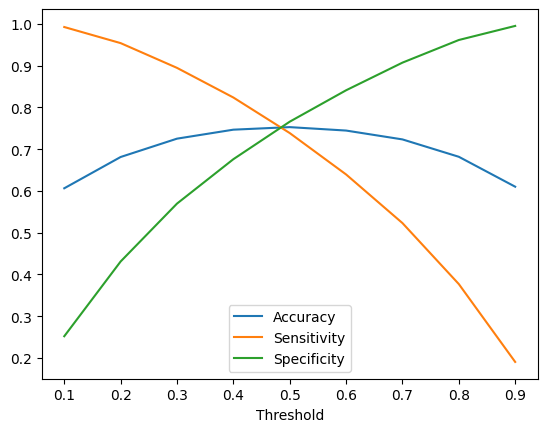

In [200]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
metrics_df.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [201]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff = 0.5
df_train['Final_Prediction'] = (df_train['Prob'] >= optimal_cutoff).astype(int)

In [202]:
df_train.head()

,Actual,Prob,Pred_0.1,Pred_0.2,Pred_0.3,Pred_0.4,Pred_0.5,Pred_0.6,Pred_0.7,Pred_0.8,Pred_0.9,Final_Prediction
41465,1,0.943048,1,1,1,1,1,1,1,1,1,1
69350,1,0.830942,1,1,1,1,1,1,1,1,0,1
28247,1,0.820431,1,1,1,1,1,1,1,1,0,1
3217,1,0.140556,1,0,0,0,0,0,0,0,0,0
73636,1,0.895176,1,1,1,1,1,1,1,1,0,1


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [203]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(df_train['Actual'], df_train['Final_Prediction'])
print(f"Training Accuracy with Optimal Cutoff: {accuracy:.4f}")

Training Accuracy with Optimal Cutoff: 0.7527


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [204]:
# Create the confusion matrix once again
cm = metrics.confusion_matrix(df_train['Actual'], df_train['Final_Prediction'])
print(cm)

[[19745  6040]
 [ 6186 17473]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [205]:
# Create variables for true positive, true negative, false positive and false negative
conf_matrix = metrics.confusion_matrix(df_train['Actual'], df_train['Final_Prediction'])

# Assign the values
tn, fp, fn, tp = conf_matrix.ravel()

# Print the results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 19745
False Positives (FP): 6040
False Negatives (FN): 6186
True Positives (TP): 17473


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [206]:
# Calculate Sensitivity
sensitivity = tn / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.8346


In [207]:
# Calculate Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7658


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [208]:
# Calculate Precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")


Precision: 0.7431


In [209]:
# Calculate Recall
recall = tp / (tp + fn)
print(f"Recall: {recall:.4f}")

Recall: 0.7385


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [210]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [211]:
# Check actual and predicted values from initial model
df_train[['Actual', 'Prob', 'Final_Prediction']].head(10)

,Actual,Prob,Final_Prediction
41465,1,0.943048,1
69350,1,0.830942,1
28247,1,0.820431,1
3217,1,0.140556,0
73636,1,0.895176,1
9855,1,0.917920,1
50907,1,0.802439,1
59157,1,0.627212,1
22307,0,0.662325,1
68756,1,0.935706,1


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

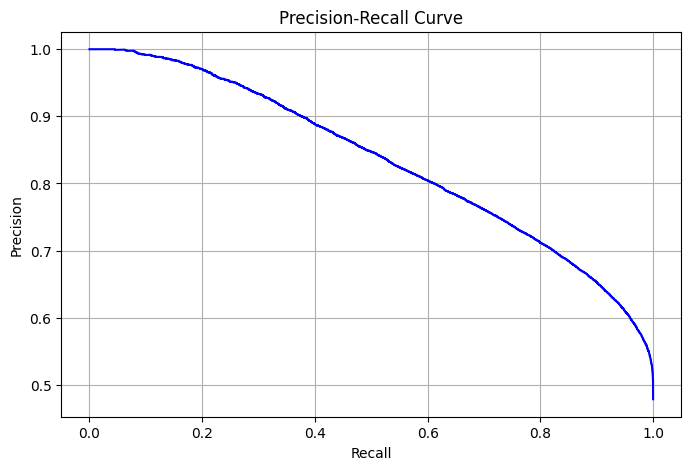

In [212]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
y_true = df_train['Actual']
y_scores = df_train['Prob']  # predicted probabilities

precision, recall, _ = precision_recall_curve(y_true, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [220]:
# Select the relevant features for validation set
col = [
    'Gender', 'Remote Work',
    'Work-Life Balance_Excellent', 'Work-Life Balance_Fair',
    'Job Satisfaction_Low', 'Job Satisfaction_Very High',
    'Performance Rating_Low',
    'Education Level_PhD',
    'Marital Status_Single',
    'Job Level_Entry', 'Job Level_Senior',
    'Company Reputation_Excellent', 'Company Reputation_Good'
]

In [222]:
X_val = X_test[col]
X_val.head()

,Gender,Remote Work,Work-Life Balance_Excellent,Work-Life Balance_Fair,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Entry,Job Level_Senior,Company Reputation_Excellent,Company Reputation_Good
23813,1,0,0,0,0,1,0,0,0,0,1,0,1
14537,1,1,0,1,0,0,0,0,1,1,0,0,0
45192,1,0,0,0,0,0,0,0,0,1,0,0,1
13765,0,0,0,0,1,0,0,0,0,1,0,0,0
3411,1,0,0,0,0,0,1,0,0,0,1,1,0


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [224]:
# Add constant to X_validation
X_val_const = sm.add_constant(X_val)
X_val_const.head()

,const,Gender,Remote Work,Work-Life Balance_Excellent,Work-Life Balance_Fair,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Entry,Job Level_Senior,Company Reputation_Excellent,Company Reputation_Good
23813,1.0,1,0,0,0,0,1,0,0,0,0,1,0,1
14537,1.0,1,1,0,1,0,0,0,0,1,1,0,0,0
45192,1.0,1,0,0,0,0,0,0,0,0,1,0,0,1
13765,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0
3411,1.0,1,0,0,0,0,0,1,0,0,0,1,1,0


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [226]:
# Retrain the model with RFE selected features
logit_model_rfe = sm.Logit(y_train_df['Attrition'], X_train_sm[['const'] + col])
result_rfe = logit_model_rfe.fit()

# Make predictions on the validation set using the retrained model
# Ensure X_val_const has the same columns as X_train_sm[['const'] + col]
X_val_const_rfe = X_val_const[['const'] + col]
y_validation_pred = result_rfe.predict(X_val_const_rfe)

# View predictions
print(y_validation_pred.head())

Optimization terminated successfully.
         Current function value: 0.521368
         Iterations 6
23813    0.096342
14537    0.736694
45192    0.430716
13765    0.803210
3411     0.106524
dtype: float64


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [248]:
# Convert predicted probabilities to DataFrame
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted_Prob'])

# Extract actual values from y_val_df using the correct column name 'Left'
actual = pd.DataFrame(y_val_df['Left'].values, columns=['Actual'])

# Reset indices to align
actual.reset_index(drop=True, inplace=True)
predicted_probability.reset_index(drop=True, inplace=True)

# Combine side by side
comparison_df = pd.concat([actual, predicted_probability], axis=1)

# Display result
print(comparison_df.head())

   Actual  Predicted_Prob
0       0        0.096342
1       1        0.736694
2       1        0.430716
3       1        0.803210
4       0        0.106524


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [249]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
optimal_threshold = 0.5    ## optimal_threshold found to be in training data =0.5
comparison_df['Final_Prediction'] = (comparison_df['Predicted_Prob'] > optimal_threshold).astype(int)

# Check the DataFrame
print("Validation Results with Final Predictions:")


# Check the DataFrame
comparison_df.head()


Validation Results with Final Predictions:


,Actual,Predicted_Prob,Final_Prediction
0,0,0.096342,0
1,1,0.736694,1
2,1,0.430716,0
3,1,0.803210,1
4,0,0.106524,0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [250]:
# Calculate the overall accuracy
accuracy = metrics.accuracy_score(comparison_df['Actual'], comparison_df['Final_Prediction'])
print(f"Accuracy of the Model on Validation Set: {accuracy:.5f}")

Accuracy of the Model on Validation Set: 0.72852


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [251]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(comparison_df['Actual'],  comparison_df['Final_Prediction'])

In [252]:
# Create variables for true positive, true negative, false positive and false negative
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Display the confusion matrix and extracted values
print("Confusion Matrix:")
print(conf_matrix)
print("\nTrue Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

Confusion Matrix:
[[8179 2846]
 [2907 7259]]

True Negative (TN): 8179
False Positive (FP): 2846
False Negative (FN): 2907
True Positive (TP): 7259


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [253]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {sensitivity:.5f}")

Sensitivity (Recall): 0.71405


In [254]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.5f}")

Specificity: 0.74186


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [255]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.5f}")

Precision: 0.71836


In [256]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.5f}")

Recall: 0.71405


## Conclusion

